In [2]:
import pandas as pd
import cv2
import sys
import matplotlib.pyplot as plt
import numpy as np
from pylab import rcParams
from google.colab.patches import cv2_imshow
# !pip install git+https://github.com/colour-science/colour

In [1]:
import colour

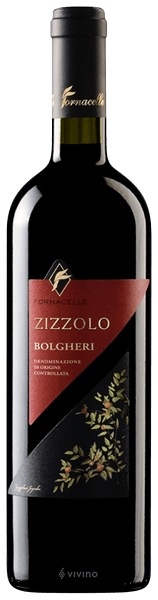

In [3]:
image_BGR = cv2.imread("/content/ZizzoloBolgheri2021.png", cv2.IMREAD_UNCHANGED)
cv2_imshow(image_BGR)

In [ ]:
image_BGR.shape

(600, 158, 4)

In [ ]:
image_BGR[0][0][3]

0

In [4]:
!unzip images.zip

Archive:  images.zip
   creating: content/images/
  inflating: content/images/TimorassoColliTortonesi2019.png  
 extracting: content/images/LaLusAlbarossa2019.png  
  inflating: content/images/BaroloArione2018.png  
 extracting: content/images/BaroloCiabotMentin2012.png  
  inflating: content/images/PoraBarbaresco2017.png  
  inflating: content/images/Barolo1942.png  
 extracting: content/images/BarbarescoAsili2010.png  
  inflating: content/images/Barberad'Asti2020.png  
  inflating: content/images/Barolo1987.png  
 extracting: content/images/PoggiodelleAmareneBarberaColliTortonesi2019.png  
  inflating: content/images/BaroloRavera2012.png  
  inflating: content/images/ConteisaLanghe2014.png  
  inflating: content/images/IlCastelloGavi2020.png  
 extracting: content/images/Rocchedell'AnnunziataTorriglioneBarolo2006.png  
  inflating: content/images/UcelineMonferratoRosso2016.png  
  inflating: content/images/GiachiniBarolo2019.png  
 extracting: content/images/VürsùBarbarescoGallina20

In [5]:
df = pd.read_csv("image_features_piemonte.csv")
df.head(3)

,Wine,link,image_names,image_link,temperature,saturation,brightness,contrast,clarity,colorfulness
0,White Sushi Wine N.V.,https://www.vivino.com/IT/en/umi-white-sushi-w...,images/WhiteSushiWineN.V..png,https://images.vivino.com/thumbs/zc1wzl67QkuoJ...,5.738831e+03,89.585949,150.137468,1.000000,0.064641,48.594532
1,Fragolino N.V.,https://www.vivino.com/IT/en/santero-fragolino...,images/FragolinoN.V..png,https://images.vivino.com/thumbs/fgUOE94-Tna3g...,2.584170e+189,96.286447,79.322088,1.000000,0.038956,21.756336
2,Il Sendallo Chardonnay 2022,https://www.vivino.com/IT/en/cantine-povero-as...,images/IlSendalloChardonnay2022.png,https://images.vivino.com/thumbs/CdCmqwMpSXmAm...,6.551379e+03,80.487722,134.599357,0.905882,0.094631,63.609181


In [6]:
images = df.image_names
images

0                           images/WhiteSushiWineN.V..png
1                                images/FragolinoN.V..png
2                     images/IlSendalloChardonnay2022.png
3             images/BuonPaggioGrignolinoPiemonte2022.png
4             images/ContradaMaestraBarberad'Asti2022.png
                              ...                        
5928    images/Rocchedell'AnnunziataTorriglioneBarolo2...
5929    images/RocchedelleRoccheBarberad'AlbaSuperiore...
5930                    images/Barberad'AlbaPulin2012.png
5931                           images/MonsúRosato2012.png
5932                                 images/Nizza2012.png
Name: image_names, Length: 5933, dtype: object

In [11]:
im = cv2.imread("/content/content/images/'Bionzo'Barberad'AstiSuperiore2019.png", cv2.IMREAD_UNCHANGED)
im.shape

(600, 158, 4)

In [13]:
quality = []
for name in images:
  if cv2.imread("/content/content/" + name, cv2.IMREAD_UNCHANGED).shape[2] == 4:
    quality.append(1)
  else:
    quality.append(0)

In [14]:
len(quality)
ones = 0
for i in quality:
  if i == 1:
    ones += 1
print(ones, len(quality), ones/ len(quality))

5529 5933 0.9319062868700488


In [15]:
df["quality"] = quality
df.head(3)

,Wine,link,image_names,image_link,temperature,saturation,brightness,contrast,clarity,colorfulness,quality
0,White Sushi Wine N.V.,https://www.vivino.com/IT/en/umi-white-sushi-w...,images/WhiteSushiWineN.V..png,https://images.vivino.com/thumbs/zc1wzl67QkuoJ...,5.738831e+03,89.585949,150.137468,1.000000,0.064641,48.594532,1
1,Fragolino N.V.,https://www.vivino.com/IT/en/santero-fragolino...,images/FragolinoN.V..png,https://images.vivino.com/thumbs/fgUOE94-Tna3g...,2.584170e+189,96.286447,79.322088,1.000000,0.038956,21.756336,1
2,Il Sendallo Chardonnay 2022,https://www.vivino.com/IT/en/cantine-povero-as...,images/IlSendalloChardonnay2022.png,https://images.vivino.com/thumbs/CdCmqwMpSXmAm...,6.551379e+03,80.487722,134.599357,0.905882,0.094631,63.609181,1


In [ ]:
df1 = pd.read_csv("image_features.csv")
df1.head(3)

,Wine,link,image_link,image_names,temperature,saturation,brightness,contrast,clarity,colorfulness
0,Bolgheri Rosso 1998,https://www.vivino.com/IT/en/le-macchiole-bolg...,https://images.vivino.com/thumbs/vqcwf45nRNaD4...,BolgheriRosso1998.png,8.665253e+22,72.145970,101.875833,1.0,0.105306,22.690002
1,Brunello di Montalcino Riserva 2010,https://www.vivino.com/IT/en/cupano-brunello-d...,https://images.vivino.com/thumbs/LQwoyH7QSIa3j...,BrunellodiMontalcinoRiserva2010.png,5.296501e+121,74.638879,83.735040,1.0,0.072747,27.365681
2,Tenuta Tignanello 'Solaia' 2006,https://www.vivino.com/IT/en/antinori-tuscany-...,https://images.vivino.com/thumbs/fJfjGhCtQ_KAu...,TenutaTignanello'Solaia'2006.png,6.119993e+03,78.032288,83.519130,1.0,0.058571,39.570771


In [ ]:
df1["quality"] = quality
df1.head(3)

,Wine,link,image_link,image_names,temperature,saturation,brightness,contrast,clarity,colorfulness,quality
0,Bolgheri Rosso 1998,https://www.vivino.com/IT/en/le-macchiole-bolg...,https://images.vivino.com/thumbs/vqcwf45nRNaD4...,BolgheriRosso1998.png,8.665253e+22,72.145970,101.875833,1.0,0.105306,22.690002,1
1,Brunello di Montalcino Riserva 2010,https://www.vivino.com/IT/en/cupano-brunello-d...,https://images.vivino.com/thumbs/LQwoyH7QSIa3j...,BrunellodiMontalcinoRiserva2010.png,5.296501e+121,74.638879,83.735040,1.0,0.072747,27.365681,1
2,Tenuta Tignanello 'Solaia' 2006,https://www.vivino.com/IT/en/antinori-tuscany-...,https://images.vivino.com/thumbs/fJfjGhCtQ_KAu...,TenutaTignanello'Solaia'2006.png,6.119993e+03,78.032288,83.519130,1.0,0.058571,39.570771,1


In [16]:
df.to_csv("image_features_piemonte.csv", index=False)

In [17]:
df2 = pd.read_csv("image_features_piemonte.csv")
df2.head(3)

,Wine,link,image_names,image_link,temperature,saturation,brightness,contrast,clarity,colorfulness,quality
0,White Sushi Wine N.V.,https://www.vivino.com/IT/en/umi-white-sushi-w...,images/WhiteSushiWineN.V..png,https://images.vivino.com/thumbs/zc1wzl67QkuoJ...,5.738831e+03,89.585949,150.137468,1.000000,0.064641,48.594532,1
1,Fragolino N.V.,https://www.vivino.com/IT/en/santero-fragolino...,images/FragolinoN.V..png,https://images.vivino.com/thumbs/fgUOE94-Tna3g...,2.584170e+189,96.286447,79.322088,1.000000,0.038956,21.756336,1
2,Il Sendallo Chardonnay 2022,https://www.vivino.com/IT/en/cantine-povero-as...,images/IlSendalloChardonnay2022.png,https://images.vivino.com/thumbs/CdCmqwMpSXmAm...,6.551379e+03,80.487722,134.599357,0.905882,0.094631,63.609181,1


Размеры:

In [22]:
shapes = []
for i in range(len(images)):
  if df.quality[i] == 1:
    shapes.append(cv2.imread("/content/content/" + df.image_names[i], cv2.IMREAD_UNCHANGED).shape[1])

In [24]:
shapes

[158,
 190,
 158,
 158,
 158,
 162,
 158,
 158,
 158,
 158,
 158,
 167,
 158,
 159,
 168,
 181,
 158,
 162,
 158,
 158,
 166,
 158,
 162,
 168,
 163,
 159,
 158,
 158,
 168,
 160,
 171,
 158,
 158,
 168,
 158,
 196,
 172,
 161,
 164,
 158,
 165,
 172,
 168,
 161,
 161,
 168,
 167,
 158,
 158,
 158,
 158,
 158,
 158,
 158,
 158,
 165,
 160,
 163,
 173,
 174,
 158,
 158,
 158,
 163,
 158,
 168,
 158,
 163,
 158,
 188,
 186,
 162,
 161,
 158,
 172,
 161,
 183,
 163,
 163,
 159,
 183,
 183,
 158,
 158,
 168,
 162,
 158,
 162,
 160,
 158,
 158,
 159,
 163,
 158,
 158,
 158,
 158,
 158,
 158,
 163,
 162,
 158,
 161,
 183,
 158,
 158,
 173,
 159,
 158,
 158,
 158,
 158,
 158,
 162,
 158,
 168,
 178,
 158,
 166,
 180,
 170,
 159,
 183,
 167,
 158,
 158,
 158,
 163,
 187,
 159,
 158,
 168,
 158,
 158,
 175,
 158,
 167,
 158,
 175,
 167,
 161,
 158,
 167,
 158,
 158,
 158,
 158,
 173,
 158,
 169,
 164,
 158,
 158,
 159,
 158,
 158,
 158,
 158,
 163,
 158,
 159,
 160,
 163,
 183,
 158,
 158,
 167